<h1 style="color:Orange">Used car sales</h1>

* how to promote sale of hybrid vehicles
* difference in sale between hybrid and non-hybrid vehicles
* a good way get buyers to think about more environmentally friendly cars

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)
df = pd.read_csv("toyota.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [3]:
print("Shape of the dataset: ", df.shape)
df.describe()

Shape of the dataset:  (6738, 9)


,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [4]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

<h2 style="color:Orange">Validation and data cleaning</h2>

In [5]:
# Check missing values
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
# Check zero values
df[df.mpg == 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [7]:
# Check unique values (should have: "Automatic, "Manual", "Semi-Auto", "Other")
df.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [8]:
# Check unique values (should have: "Petrol", "Diesel", "Hybrid", "Other")
df.fuelType.unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

In [9]:
# Check engine size values
print(f"Errors with engine size == 0 \n{df[df.engineSize == 0].count()}")
df[df.engineSize == 0]

Errors with engine size == 0 
model           6
year            6
price           6
transmission    6
mileage         6
fuelType        6
tax             6
mpg             6
engineSize      6
dtype: int64


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2535,Yaris,2016,12300,Manual,6148,Hybrid,0,86.0,0.0
2545,Yaris,2016,11000,Automatic,39909,Hybrid,0,86.0,0.0
5126,Aygo,2019,9800,Manual,3635,Petrol,150,56.5,0.0
5233,Aygo,2019,8000,Manual,8531,Petrol,145,56.5,0.0
5257,Aygo,2019,8000,Manual,5354,Petrol,145,56.5,0.0
5960,C-HR,2017,14300,Manual,46571,Petrol,145,47.1,0.0


In [10]:
# Drop rows with engine size == 0
df.drop(df[df.engineSize == 0].index, inplace=True)

The median year is 2017.0


<AxesSubplot:xlabel='year', ylabel='Count'>

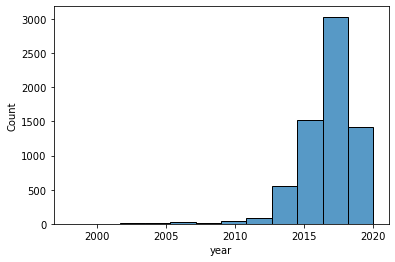

In [11]:
# Distribution by year
print(f"The median year is {df.year.median()}")
sns.histplot(df["year"], bins=12)

In [12]:
# Filter for cars 2013 and newer (removes outliers for price and mileage)
df_2013 = df.query("year >= 2013")

(6520, 9)


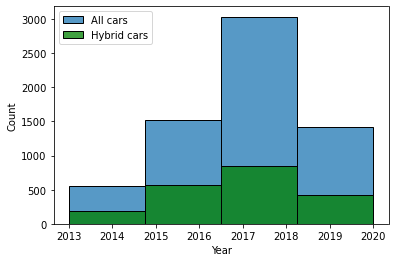

In [13]:
print(df_2013.shape)
sns.histplot(
    df_2013["year"], bins=4, label="All cars"
)  # Closer to a normal distribution (still majority of cars from 2017)
sns.histplot(
    df_2013.query("fuelType == 'Hybrid'")["year"],
    bins=4,
    color="green",
    label="Hybrid cars",
)
plt.xlabel("Year")
plt.legend()

#### Validation and data cleaning summary

* no missing values
* no zero values in the MPG column
* transmission unique values match dataset description
* fuelType unique values match dataset description
* 6 rows with cars that had engine size == 0 were removed
* based on the distribution, further analysis was done only on cars 2013 and newer (most
  cars fit into this range)
    * the distribution was similar for hybrid vehicles although not as many were from
      2017 as petrol vehicles


<h2 style="color:Orange">Exploratory Analysis</h2>

<h3 style="color:Green">Correlation of factors with hybrid vehicles</h3>

In [42]:
# Make a binary column for hybrid cars (1) or not (0) to see corelation between values
df_corr = df_2013.copy()
df_corr["is_hybrid"] = df["fuelType"].apply(lambda x: 1 if x == "Hybrid" else 0)
df_corr.drop(["model", "transmission", "fuelType"], axis=1, inplace=True)
df_corr.head()

,year,price,mileage,tax,mpg,engineSize,is_hybrid
0,2016,16000,24089,265,36.2,2.0,0
1,2017,15995,18615,145,36.2,2.0,0
2,2015,13998,27469,265,36.2,2.0,0
3,2017,18998,14736,150,36.2,2.0,0
4,2017,17498,36284,145,36.2,2.0,0


In [43]:
df_corr.corr()

,year,price,mileage,tax,mpg,engineSize,is_hybrid
year,1.000000,0.384451,-0.665315,0.536585,-0.168901,-0.014736,-0.058611
price,0.384451,1.000000,-0.232250,0.251287,-0.073069,0.768865,0.482161
mileage,-0.665315,-0.232250,1.000000,-0.343161,0.140249,0.172815,0.110623
tax,0.536585,0.251287,-0.343161,1.000000,-0.409715,0.124386,-0.304994
mpg,-0.168901,-0.073069,0.140249,-0.409715,1.000000,-0.092648,0.504403
engineSize,-0.014736,0.768865,0.172815,0.124386,-0.092648,1.000000,0.527051
is_hybrid,-0.058611,0.482161,0.110623,-0.304994,0.504403,0.527051,1.000000


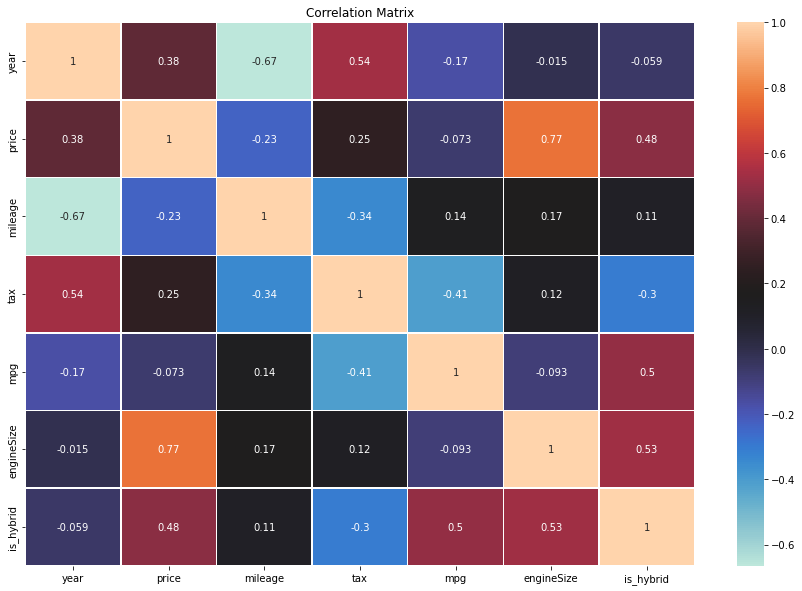

In [44]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap="icefire", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#### Correlation matrix summary

* in regards to hybrid cars, there are several strong correlations
    * price -> hybrid cars are more expensive on average than non-hybrid cars 
    * mpg -> as expected higher mpg is associated with hybrid vehicles
    * engine size -> most hybrid cars had bigger engine size (this can be due to the
      specific models that were sold)
* the most correlated variable is engine size with price, with increase in engine size
  the price increased as well, and that is true for hybrid vehicles as they showed
  larger engine size

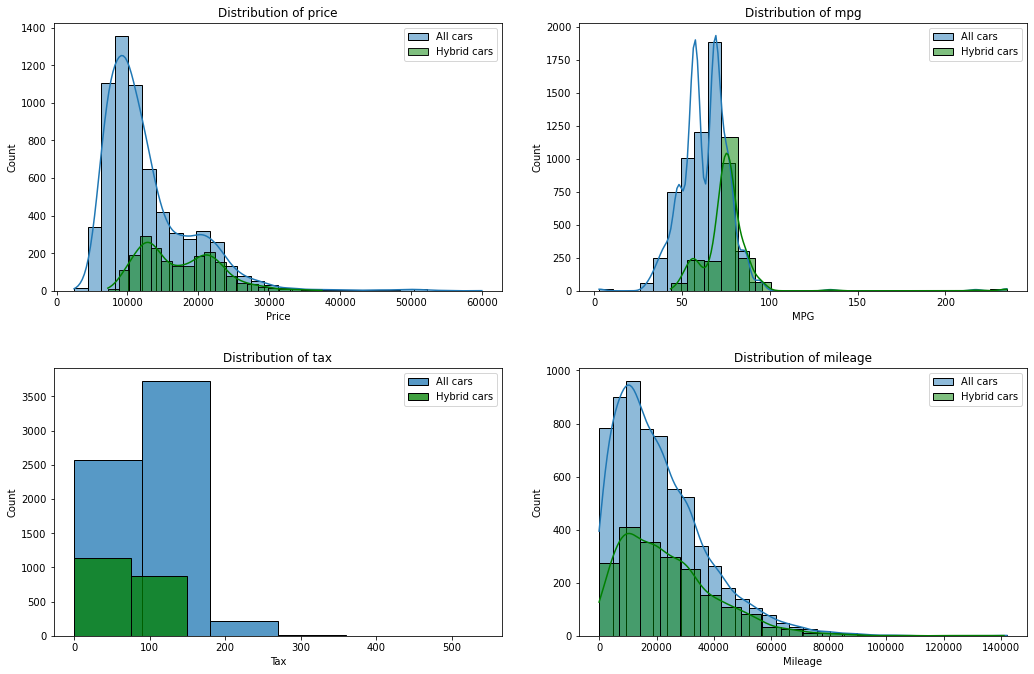

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of price (most cars bought were around 10k)
sns.histplot(
    df_2013["price"], bins=30, ax=axes[0, 0], kde=True, legend=True, label="All cars"
)
sns.histplot(
    data=df_2013.query("fuelType == 'Hybrid'"),
    x="price",
    bins=20,
    ax=axes[0, 0],
    kde=True,
    color="green",
    label="Hybrid cars",
)
axes[0, 0].set_title("Distribution of price")
axes[0, 0].set_xlabel("Price")
axes[0, 0].legend()

# Distribution of mpg
sns.histplot(df_2013["mpg"], bins=30, ax=axes[0, 1], kde=True, label="All cars")
sns.histplot(
    data=df_2013.query("fuelType == 'Hybrid'"),
    x="mpg",
    bins=20,
    ax=axes[0, 1],
    kde=True,
    color="green",
    label="Hybrid cars",
)
axes[0, 1].set_title("Distribution of mpg")
axes[0, 1].set_xlabel("MPG")
axes[0, 1].legend()

# Distribution of tax
sns.histplot(df_2013["tax"], bins=6, ax=axes[1, 0], label="All cars")
sns.histplot(
    data=df_2013.query("fuelType == 'Hybrid'"),
    x="tax",
    bins=2,
    ax=axes[1, 0],
    color="green",
    label="Hybrid cars",
)
axes[1, 0].set_title("Distribution of tax")
axes[1, 0].set_xlabel("Tax")
axes[1, 0].legend()

# Distribution of mileage
sns.histplot(df_2013["mileage"], bins=30, ax=axes[1, 1], kde=True, label="All cars")
sns.histplot(
    data=df_2013.query("fuelType == 'Hybrid'"),
    x="mileage",
    bins=20,
    ax=axes[1, 1],
    kde=True,
    color="green",
    label="Hybrid cars",
)
axes[1, 1].set_title("Distribution of mileage")
axes[1, 1].set_xlabel("Mileage")
axes[1, 1].legend()

plt.tight_layout(pad=3.0)
plt.show()

#### Distribution of the data

**Price**
* most cars were bought around 10,000
    * for hybrid cars the distribution was slightly shifted, showing higher prices
      across the range compare to other types of cars
* very few cars were sold over 30,000

**MPG**
* most sales involved cars with mpg higher than 50  
    * in this category hybrid cars performed better compared to other non hybrid
      vehicles
    
**Tax**
* as there were changes to council tax in 2017, there are still some non hybrid vehicles
  with sub 100 tax
  * in this category hybrid cars also performed better

**Mileage**
* most sales were for cars with less than 60,000 miles

In [46]:
df_2013["fuelType"].value_counts()

Petrol    3938
Hybrid    2020
Diesel     460
Other      102
Name: fuelType, dtype: int64

Text(0, 0.5, 'Sales')

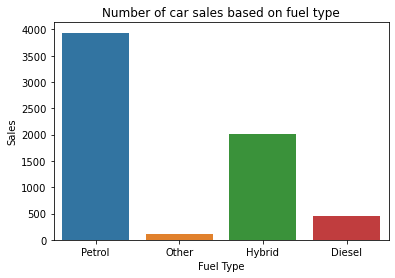

In [47]:
# Plot number of sales based on fuel type
sns.countplot(x="fuelType", data=df_2013)
plt.title("Number of car sales based on fuel type")
plt.xlabel("Fuel Type")
plt.ylabel("Sales")

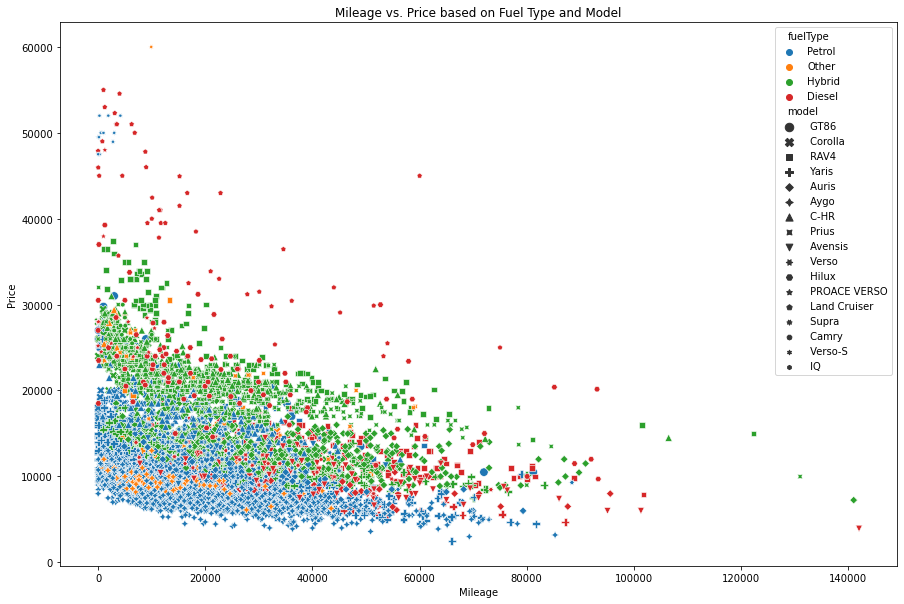

In [48]:
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=df_2013, x="mileage", y="price", hue="fuelType", style="model", size="model"
)
plt.title("Mileage vs. Price based on Fuel Type and Model")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

 <h3 style="color:Green">Grouping by fuel type</h3>

In [49]:
df_fuel_grouped = df_2013.groupby("fuelType")

In [50]:
df_fuel_grouped["price"].agg(["mean", "median", "min", "max", "sum", "count"])

,mean,median,min,max,sum,count
fuelType,,,,,,
Diesel,16636.445652,13495.0,3930,54991,7652765,460
Hybrid,17291.703465,16535.0,7240,37440,34929241,2020
Other,14352.764706,10497.5,6095,59995,1463982,102
Petrol,9975.362621,9250.0,2470,51995,39282978,3938


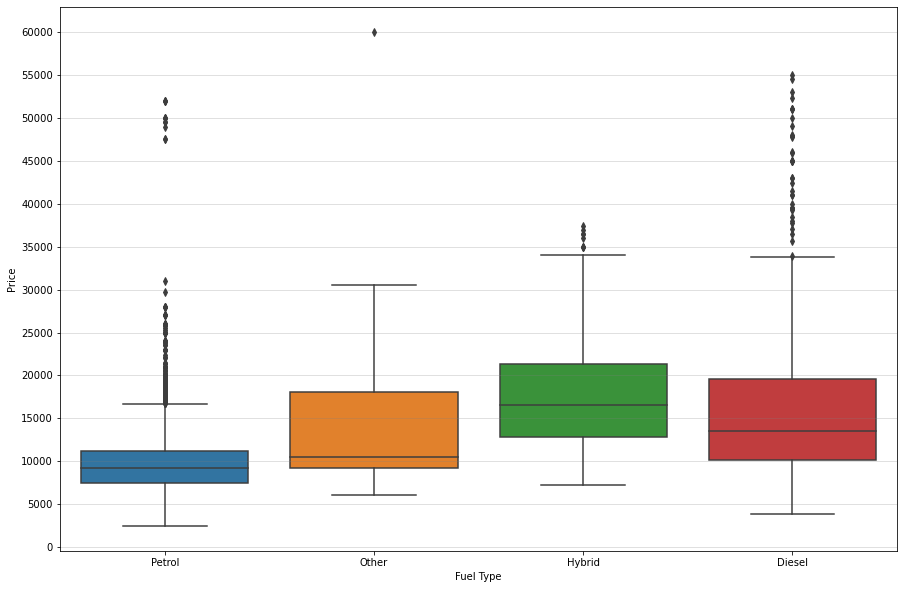

In [51]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_2013, x="fuelType", y="price")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.yticks(range(0, 65000, 5000))
plt.grid(axis="y", color="grey", alpha=0.3)
plt.show()

In [52]:
df_fuel_grouped["mpg"].agg(["mean", "median", "min", "max"])

,mean,median,min,max
fuelType,,,,
Diesel,52.655652,57.6,2.8,83.1
Hybrid,75.290644,74.3,43.5,235.0
Other,71.576471,67.0,34.5,235.0
Petrol,58.342737,58.0,6.0,86.0


In [53]:
df_fuel_grouped["tax"].agg(["mean", "median", "min", "max"])

,mean,median,min,max
fuelType,,,,
Diesel,141.945652,145,0,540
Hybrid,60.792079,20,0,150
Other,101.764706,140,0,205
Petrol,104.494667,145,0,265


#### Analysis based on fuel type

* there were almost 4000 petrol vehicles sold and 2020 hybrid ones and 460 diesel
  vehicles sold
    * people are clearly less willing to purchase diesel vehicles and are opting out
      more for hybrids
    * however petrol vehicles were on average 58% cheaper than hybrid ones
* both mpg and tax were noticeably better for hybrids compared to others

 <h3 style="color:Green">Grouping by Model</h3>

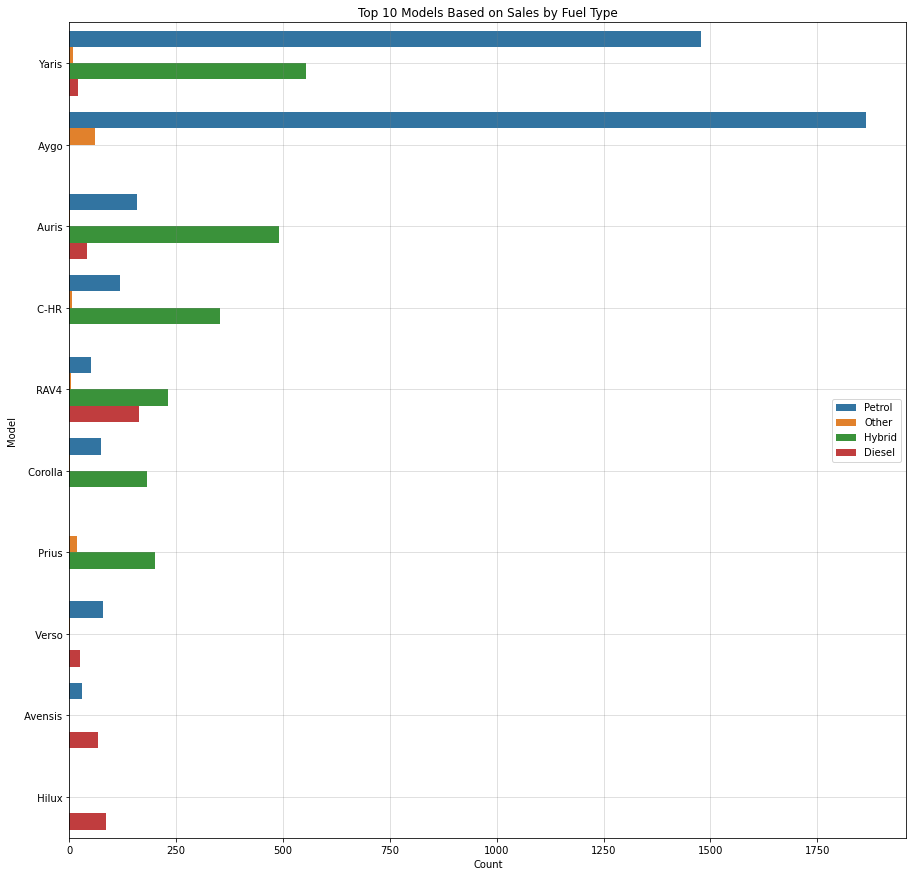

In [58]:
df_model_grouped = df_2013.groupby("model")
plt.figure(figsize=(15, 15))
sns.countplot(
    y="model",
    hue="fuelType",
    data=df_2013,
    order=df_model_grouped.size().sort_values(ascending=False).iloc[:10].index,
)
plt.legend(loc="center right")
plt.title("Top 10 Models Based on Sales by Fuel Type")
plt.xlabel("Count")
plt.ylabel("Model")
plt.grid(color="grey", alpha=0.3)
plt.show()

#### Models

* most sales were of cheaper, smaller hatch backs such as Yaris and Aygo
    * petrol Yaris outperformed hybrid version in terms of sales
    * and Aygo does not have a hybrid version
        * based on the data if there was a similar model to the Aygo but as hybrid, it
          is believed that it would attract buyers

* Next top 5 models however, the hybrid versions outperformed the non-hybrid ones

 <h3 style="color:Green">Analysis based on the MPG</h3>

In [55]:
df2 = (
    df_2013.groupby(["model", "fuelType"])[["mpg", "price"]]
    .agg(["mean", "count"])
    .sort_values(by=("price", "count"), ascending=False)
    .drop([("mpg", "count")], axis=1)
)
df2.columns = ["mpg_mean", "price_mean", "count"]
df2.reset_index(inplace=True)
df2.head(10)

,model,fuelType,mpg_mean,price_mean,count
0,Aygo,Petrol,65.234316,7937.693298,1865
1,Yaris,Petrol,54.868425,10263.349561,1479
2,Yaris,Hybrid,79.316968,12157.796029,554
3,Auris,Hybrid,74.010794,13904.849287,491
4,C-HR,Hybrid,73.140341,21759.215909,352
5,RAV4,Hybrid,55.284348,22947.121739,230
6,Prius,Hybrid,95.665672,19621.965174,201
7,Corolla,Hybrid,74.813812,23146.038674,181
8,RAV4,Diesel,55.290123,13209.549383,162
9,Auris,Petrol,55.100633,10112.860759,158


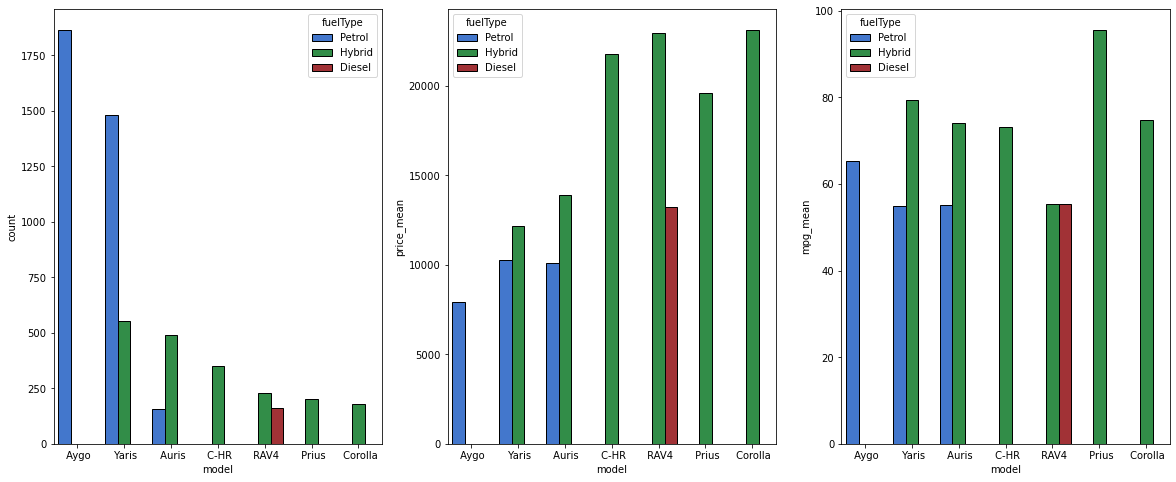

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
sns.barplot(
    data=df2.head(10),
    x="model",
    y="count",
    hue="fuelType",
    palette=["#2c72e3", "#239c40", "#b32025"],
    ax=axes[0],
    edgecolor="black",
)
sns.barplot(
    data=df2.head(10),
    x="model",
    y="price_mean",
    hue="fuelType",
    palette=["#2c72e3", "#239c40", "#b32025"],
    ax=axes[1],
    edgecolor="black",
)
sns.barplot(
    data=df2.head(10),
    x="model",
    y="mpg_mean",
    hue="fuelType",
    palette=["#2c72e3", "#239c40", "#b32025"],
    ax=axes[2],
    edgecolor="black",
)
plt.show()

#### Conclusion

* hybrid cars are more expensive on average than non-hybrid cars
* according to the data price seems to be the main factor driving sales
* however hybrid more expensive models that offer hybrid version outperformed petrol
  ones
* the lack of a cheap hybrid alternative to models such as Aygo is likely one of the big
  reason in lower hybrid sales
<br></br>
* however it is believed that in future hybrid models will outperform petrol ones
    * as there has been a change to road tax prior to 2017 as small engine vehicles were
      much cheaper to tax
* however due to the increased price of hybrid vehicles, even though they amounted for
  half the sale of petrol vehicles, they brought about the same amount of revenue